1/-my project will be focusing on American background checks. it would detremine what are population has the s\most crime record in the US.
2/-What are the number of background check requested for handguns in the month? What are the number of background check requested for long_guns in the month?
3/-FBI_Background_checks_1999_2020 Source: National Instant Criminal Background Checks System (NICS) enriched dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#data source; Kaggle
#Remaining question from part 1
#Good idea, but you are missing some of part 1. Include it in part 2 and I will give you the points (just copy and paste this comment into your comments of part 2 submission.)
df = pd.read_csv('/Users/mohamedbassimbo/Downloads/FBI_background_check.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   month         12495 non-null  object
 1   state         12495 non-null  object
 2   handgun       12495 non-null  int64 
 3   long_gun      12495 non-null  int64 
 4   total         12495 non-null  int64 
 5   centralPoint  12495 non-null  object
 6   population    12495 non-null  int64 
 7   geometry      12495 non-null  object
 8   xtext         12495 non-null  int64 
 9   ytext         12495 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 976.3+ KB


In [4]:
df.dtypes

month           object
state           object
handgun          int64
long_gun         int64
total            int64
centralPoint    object
population       int64
geometry        object
xtext            int64
ytext            int64
dtype: object

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(12495, 10)

In [7]:
df.head()

,month,state,handgun,long_gun,total,centralPoint,population,geometry,xtext,ytext
0,2020-03,Alabama,34897,17850,52747,POINT (-86.8295337 33.2588817),4779736,"POLYGON ((-85.05441500000001 31.108696, -85.00...",0,0
1,2020-03,Arizona,46377,19346,65723,POINT (-111.7632755 34.395342),6392017,"POLYGON ((-109.045225 36.999912, -109.043673 3...",0,0
2,2020-03,Arkansas,15304,8968,24272,POINT (-92.4479108 35.2048883),2915918,"POLYGON ((-89.662919 36.023073, -89.673513 35....",0,0
3,2020-03,California,81543,48616,130159,POINT (-118.7559974 36.7014631),37253956,"POLYGON ((-114.354901 34.464667, -114.165972 3...",-100,0
4,2020-03,Colorado,43322,22756,66078,POINT (-105.6077167 38.7251776),5029196,"POLYGON ((-102.050174 40.000815, -102.040123 3...",0,0


In [8]:
df.describe()

,handgun,long_gun,total,population,xtext,ytext
count,12495.000000,12495.000000,12495.000000,1.249500e+04,12495.000000,12495.000000
mean,7299.201841,8731.815686,16031.017527,6.258674e+06,18.061224,0.816327
std,9803.821634,9293.986204,16929.142400,6.815170e+06,60.009343,49.068213
min,0.000000,0.000000,0.000000,5.636260e+05,-120.000000,-120.000000
25%,1493.500000,2919.000000,5008.500000,1.852994e+06,0.000000,0.000000
50%,4077.000000,6081.000000,10782.000000,4.533372e+06,0.000000,0.000000
75%,9029.500000,11284.000000,20655.500000,6.724540e+06,60.000000,10.000000
max,147714.000000,108058.000000,209541.000000,3.725396e+07,160.000000,120.000000


In [9]:
df.isna().sum()

month           0
state           0
handgun         0
long_gun        0
total           0
centralPoint    0
population      0
geometry        0
xtext           0
ytext           0
dtype: int64

In [10]:
df['population'].mean()

6258673.591836735

In [11]:
df.var()

handgun       9.611492e+07
long_gun      8.637818e+07
total         2.865959e+08
population    4.644655e+13
xtext         3.601121e+03
ytext         2.407690e+03
dtype: float64

In [12]:
df.var(axis=1)

0        3.774523e+12
1        6.754426e+12
2        1.407762e+12
3        2.306662e+14
4        4.171930e+12
             ...     
12490    1.065461e+13
12491    7.529751e+12
12492    5.702704e+11
12493    5.384373e+12
12494    5.279099e+10
Length: 12495, dtype: float64

In [13]:
print(df.describe())

             handgun       long_gun          total    population  \
count   12495.000000   12495.000000   12495.000000  1.249500e+04   
mean     7299.201841    8731.815686   16031.017527  6.258674e+06   
std      9803.821634    9293.986204   16929.142400  6.815170e+06   
min         0.000000       0.000000       0.000000  5.636260e+05   
25%      1493.500000    2919.000000    5008.500000  1.852994e+06   
50%      4077.000000    6081.000000   10782.000000  4.533372e+06   
75%      9029.500000   11284.000000   20655.500000  6.724540e+06   
max    147714.000000  108058.000000  209541.000000  3.725396e+07   

              xtext         ytext  
count  12495.000000  12495.000000  
mean      18.061224      0.816327  
std       60.009343     49.068213  
min     -120.000000   -120.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%       60.000000     10.000000  
max      160.000000    120.000000  


{'whiskers': [<matplotlib.lines.Line2D at 0x7fdb17cd8a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdb17cf0160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdb17cd8700>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdb17cf0820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdb17cf0b80>],
 'means': []}

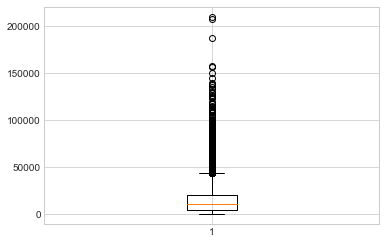

In [14]:
plt.boxplot('total', data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdb179891f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdb179898b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdb17c31e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdb17989f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdb17995310>],
 'means': []}

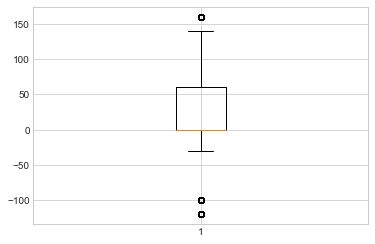

In [15]:
plt.boxplot('xtext', data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdb17962be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdb179702e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdb17962850>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdb179709a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdb17970d00>],
 'means': []}

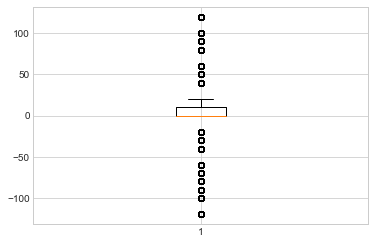

In [16]:
plt.boxplot('ytext', data=df)

(array([1020.,    0.,    0., 1020., 6375.,  510., 1275., 1275.,  510.,
         510.]),
 array([-120.,  -92.,  -64.,  -36.,   -8.,   20.,   48.,   76.,  104.,
         132.,  160.]),
 <BarContainer object of 10 artists>)

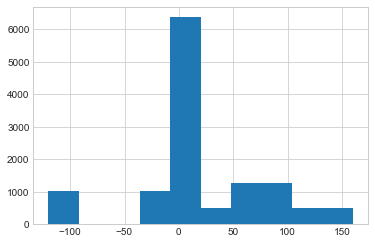

In [17]:
# ytext vertical offset for the label (the U.S. states located around NYC are very close, so we want an offset to represent the values we want to show
plt.hist(df['xtext'])

(array([ 510.,  510., 1020.,  510.,  510., 6885.,  255., 1020.,  765.,
         510.]),
 array([-120.,  -96.,  -72.,  -48.,  -24.,    0.,   24.,   48.,   72.,
          96.,  120.]),
 <BarContainer object of 10 artists>)

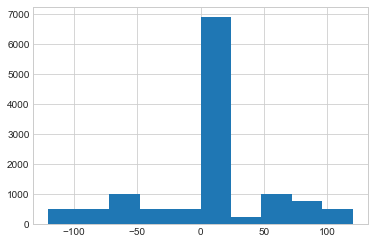

In [18]:
#ytext vertical offset for the label (the U.S. states located around NYC are very close, so we want an offset to represent the values we want to show
plt.hist(df['ytext'])

(array([5865., 3570., 1530.,  510.,  255.,  255.,  255.,    0.,    0.,
         255.]),
 array([  563626.,  4232659.,  7901692., 11570725., 15239758., 18908791.,
        22577824., 26246857., 29915890., 33584923., 37253956.]),
 <BarContainer object of 10 artists>)

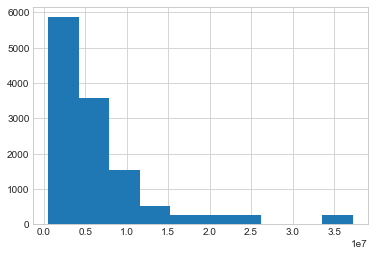

In [19]:
plt.hist(df['population'])

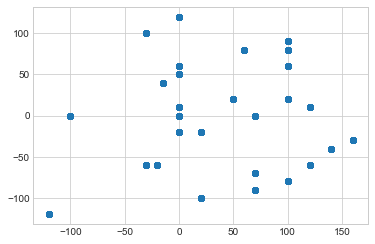

In [21]:
plt.scatter('xtext', 'ytext', data=df, alpha=0.5)

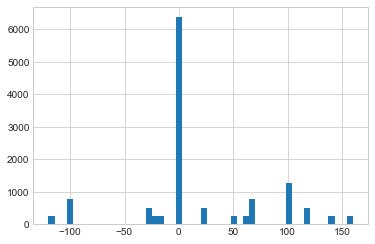

In [26]:
plt.hist(df['xtext'], bins=50)
plt.show()

<AxesSubplot:>

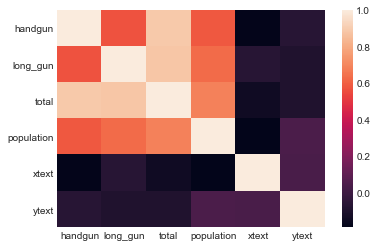

In [28]:
sns.heatmap(df.corr())

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [45]:
type(df)

sklearn.utils.Bunch

In [46]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('xtext',axis=1), 
                                                    df['ytext'])

In [27]:
lgmodel = LogisticRegression(max_iter=1000)


In [24]:
x=df.drop('xtext',axis=1)
y = df['ytext']

In [25]:
y

0          0
1          0
2          0
3          0
4          0
        ... 
12490      0
12491      0
12492    -80
12493    120
12494      0
Name: ytext, Length: 12495, dtype: int64

In [14]:
lm = LinearRegression()